In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats 
from scipy.stats import chi2_contingency


In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
data1 = pd.read_csv("/Users/keksmacbookair/Desktop/COURSE_WORKS/Year_One/course_work_sem_2/Probability_and_statistics/data_Sets/diamonds.csv")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53920 entries, 0 to 53919
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53920 non-null  int64  
 1   carat    53920 non-null  float64
 2   cut      53920 non-null  object 
 3   color    53920 non-null  object 
 4   clarity  53920 non-null  object 
 5   depth    53920 non-null  float64
 6   table    53920 non-null  float64
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [17]:
missing = data1.isna().sum()
missing
#no missing data here 

data1.describe()

,price,carat,depth,table,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,3933.492174,0.798018,61.749560,57.456769,5.731337,5.734703,3.538854
std,3989.963677,0.474061,1.432414,2.233927,1.121807,1.142192,0.705736
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5327.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

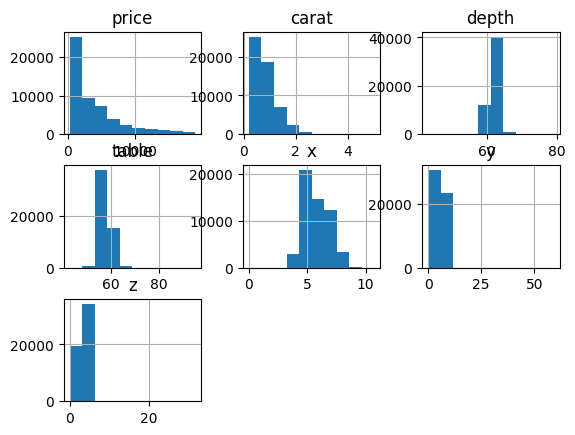

In [ ]:
data1.hist()
#not normally distributed data

In [22]:
mean_carat = np.mean(data1["carat"])
print(f"The mean of carat is {mean_carat}")

median_carat = np.median(data1["carat"])
print(f"The median of carat is {median_carat}")

std_carat = np.std(data1["carat"],ddof = 1)
print(f"The std of carat is {std_carat}")

The mean of carat is 0.7980181750741839
The median of carat is 0.7
The std of carat is 0.4740609442434169


Text(0.5, 1.0, 'A histogram on prices of diamonds from the diamonds dataset')

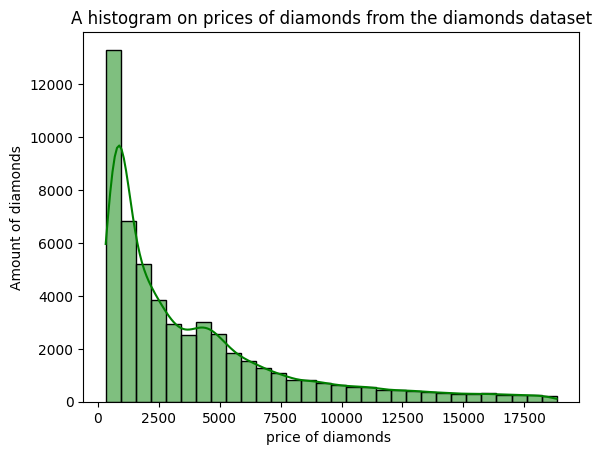

In [44]:
sn.histplot(data= data1, x = "price",bins = 30, kde = True, color = "Green")
plt.xlabel ("price of diamonds ")
plt.ylabel ("Amount of diamonds")
plt.title ("A histogram on prices of diamonds from the diamonds dataset")


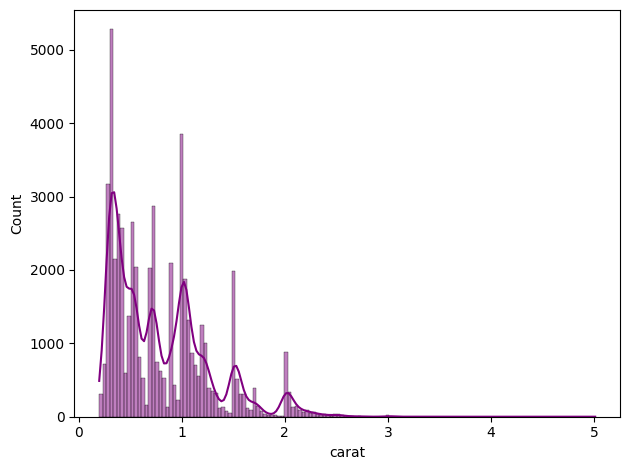

In [43]:
sn.histplot(data=data1,x='carat',kde=True,color = "purple")
plt.tight_layout()
plt.show()

In [52]:
data2 = data1[["carat","price"]]
data2

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53915,0.72,2757
53916,0.72,2757
53917,0.70,2757
53918,0.86,2757


Text(0.5, 1.0, 'Thick of it ')

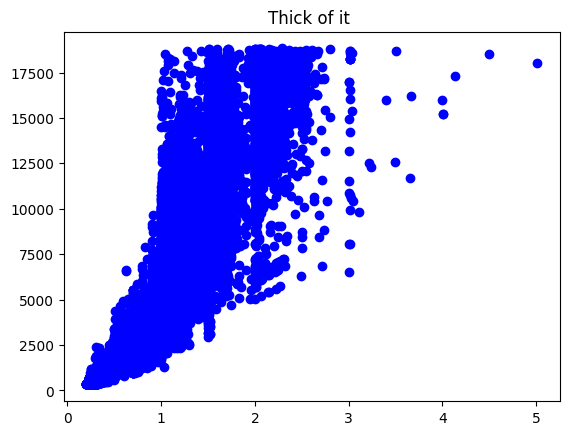

In [ ]:
#carat and price are both continuous variables 
# so to get the correlation between continuous varaibales 
#VISUALISATION
#------Here we use a scatterplot/or a heatmap-------
plt.scatter(data=data1,x = "carat", y ="price",color = "Blue")
plt.title("Thick of it ")

In [ ]:
# STATISTICALLY
# ----Here we use a correlation matrix ---
corr_cat_pri =  data1[["carat","price"]].corr()
corr_cat_pri
#They have a very high correlation to each other 
####OR-------
correlation = data1['carat'].corr(data1['price'])
print(f"Correlation between carat and price: {correlation}")

Correlation between carat and price: 0.9215900813022186


<Axes: ylabel='carat'>

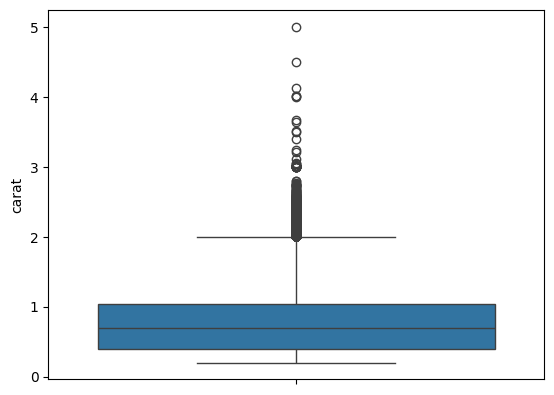

In [66]:
sn.boxplot(data1, y = "carat")

In [ ]:
###carrying out the t test 
value = 2100
from statsmodels.stats.weightstats import ztest as ztest
z_stat, p_value = ztest(data1["price"], value)
print("Z-statistic:", z_stat)
print("P-value:", p_value)
print(np.mean(data1['price']))

In [79]:
Contig_table = pd.crosstab(index=data1["cut"],columns=data1["color"])

result = chi2_contingency(Contig_table)

result[1]

np.float64(1.2976089313827201e-51)

In [75]:
data1

,price,carat,cut,color,clarity,depth,table,x,y,z,depth_bin
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,60-80
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,40-60
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,40-60
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,60-80
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,60-80
...,...,...,...,...,...,...,...,...,...,...,...
53915,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,60-80
53916,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,60-80
53917,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,60-80
53918,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,60-80


In [74]:
##Marginal probabilities 
##categorical 
cut_prob = len(data1[data1["cut"] == "Premium"])/len(data1)
cut_prob

##Continuous

bins = [0,20,40,60,80]
labels = ("0-20","20-40","40-60","60-80")

data1["depth_bin"] = pd.cut(data1["depth"],bins = bins, labels= labels, right = False)

cont_prob = data1["depth_bin"].value_counts(normalize=True).sort_index()
cont_prob


depth_bin
0-20     0.000000
20-40    0.000000
40-60    0.094789
60-80    0.905211
Name: proportion, dtype: float64